# Train a linear model for sentiment classification


# Development environment


In [ ]:
# uncomment to install the following packages
# ! pip install scikit-learn
# ! pip install datasets
# ! pip install wandb
# ! pip install seaborn 

In [1]:
import pandas as pd
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
import wandb
import time

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/olivia/sutd-courses/mlops/.mlopsEnv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Login to Weights and Biases


In [2]:
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /home/olivia/.netrc


True

In [3]:
datetime = time.strftime("%Y%m%d-%H%M%S")
wandb.init(
      # Set the project where this run will be logged
      project="sutd-mlops-project", 
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"experiment_session2_run_{datetime}", 
      # Track hyperparameters and run metadata
      config={
      "learning_rate": 0.01,
      "loss": "log_loss",
      "penalty": "l2",
      "architecture": "SGDClassifier",
      "dataset_name": "rotten_tomatoes",
      })
config = wandb.config

wandb: Currently logged in as: oliviamoveon (olivia-liu). Use `wandb login --relogin` to force relogin


# Prepare data


In [4]:
dataset = load_dataset(config.dataset_name)
dataset["train"][0]

Generating test split: 100%|██████████| 1066/1066 [00:00<00:00, 1393743.16 examples/s]


{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

In [7]:
print(dataset["train"].column_names)

['text', 'label']


In [11]:
labels = set(dataset['train']['label'])
print("Labels:", labels)

Labels: {0, 1}


Text(0.5, 0, 'label')

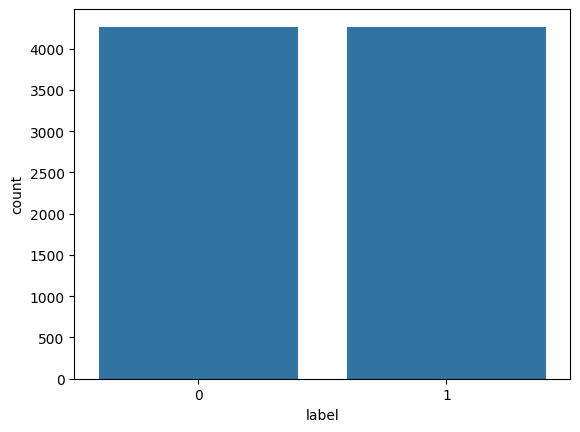

In [12]:
sns.countplot(x=dataset['train']['label'])
plt.xlabel('label')

In [22]:
train_text = dataset['train']['text']
train_labels = dataset['train']['label']

test_text = dataset['test']['text']
test_labels = dataset['test']['label']

In [23]:
count_vect = CountVectorizer()
train_features = count_vect.fit_transform(train_text)
test_features = count_vect.transform(test_text)


# Train the model


In [24]:
model = SGDClassifier(
            loss = config.loss, 
            penalty = config.penalty,
            learning_rate = 'constant', 
            eta0 = config.learning_rate
        ).fit(train_features, train_labels)

# Test the model


In [25]:
test_predicted = model.predict(test_features)
test_proba = model.predict_proba(test_features)
accuracy = metrics.accuracy_score(test_labels, test_predicted)
print(accuracy)

0.7654784240150094


In [26]:
wandb.log({"accuracy": accuracy})
wandb.sklearn.plot_precision_recall(test_labels, test_proba, ["negative", "positive"])



wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.


In [27]:
wandb.finish()


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


accuracy,▁
accuracy,0.76548


# What to try next

- experiment with different training parameters (iterations, learning rate, regulartization, ...)
- experiment with different training set sizes
- the dataset also has a validation set, what is the accuracy here?
- use Weights & Biases plots to get more insights into the model behavior 
